#### 2D Fourier Transform in Python

[출처]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

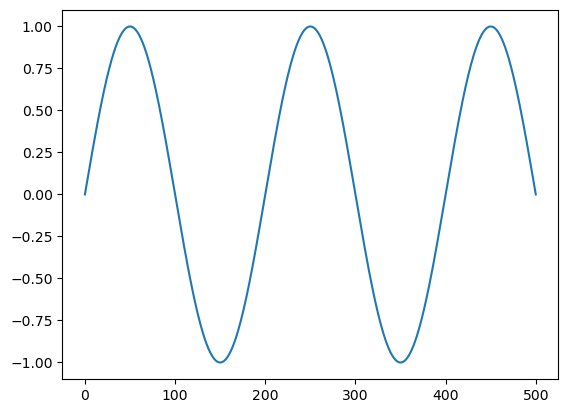

In [1]:
# Numpy 1d sin wave
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 501, 1)
T = 200
f = 1/ T

y = np.sin(2*np.pi*f*x)


plt.plot(x, y)
plt.show()


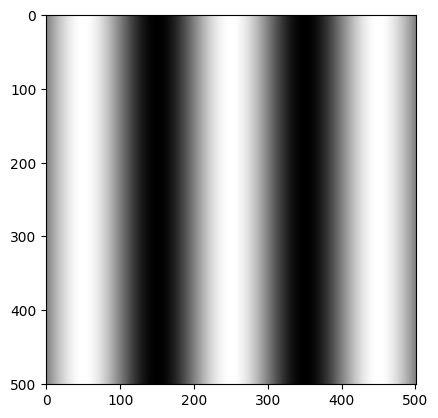

In [6]:
# 2d grating
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 501, 1)

X, Y = np.meshgrid(x,x)
grating = np.sin(2 * np.pi * X * f)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

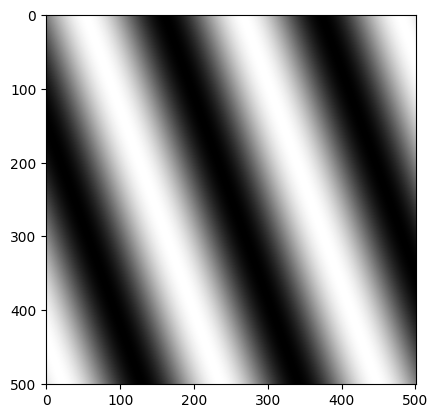

In [13]:
# 패턴 회전

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 501, 1)
X, Y = np.meshgrid(x, x)
T = 200
f = 1/ T
angle = np.pi/9
grating = np.sin(2*np.pi*f*(X*np.cos(angle)-Y*np.sin(angle)))
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

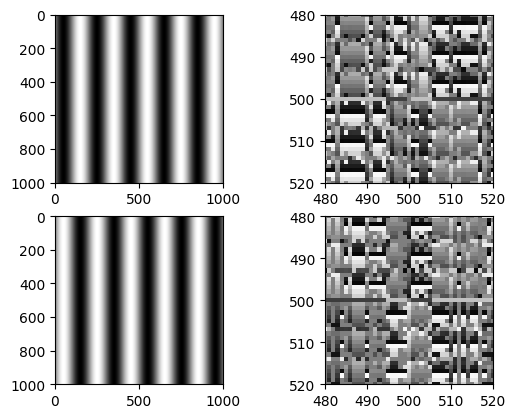

In [5]:
# Phase 변환 후 Fourier Transform
import numpy as np
import matplotlib.pyplot as plt

# 1001x1001 크기 이므로 중심이 500x500 임(크기를 홀수로 지정한 이유)
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

T = 200
f = 1 / T
angle = 0 
phase_shift = np.pi  # Phase shift 추가 (예: π/6)

grating = np.sin(2*np.pi*f*(X*np.cos(angle)-Y*np.sin(angle)))

grating_2 = np.sin(2*np.pi*f*(X*np.cos(angle)-Y*np.sin(angle))+ phase_shift)


plt.set_cmap("gray")

plt.subplot(221)
plt.imshow(grating)

# Fourier transform 진행
ft = np.fft.fft2(grating)

ft = np.fft.fftshift(ft)

plt.subplot(222)
plt.imshow(np.angle(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])

ft_2 = np.fft.fft2(grating_2)

ft_2 = np.fft.fftshift(ft_2)

plt.subplot(223)
plt.imshow(grating_2)

plt.subplot(224)
plt.imshow(np.angle(ft_2))
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.show()

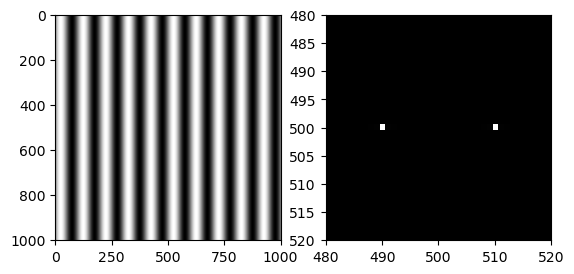

In [17]:
# Fourier Transform
import numpy as np
import matplotlib.pyplot as plt

# 1001x1001 크기 이므로 중심이 500x500 임(크기를 홀수로 지정한 이유)
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

T = 100 # 위에 비해 주기를 절반으로 설정
f = 1 / T
angle = 0 

grating = np.sin(2*np.pi*f*(X*np.cos(angle)-Y*np.sin(angle)))

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Fourier transform 진행
ft = np.fft.fft2(grating)

ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.show()

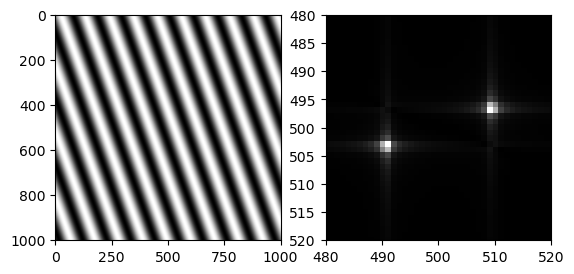

In [28]:
# Fourier Transform
import numpy as np
import matplotlib.pyplot as plt

# 1001x1001 크기 이므로 중심이 500x500 임(크기를 홀수로 지정한 이유)
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

# 주기가 길면 주파수가 짧음(fft 결과가 원점에 가까움)
T = 100 # 위에 비해 주기를 절반으로 설정
f = 1 / T
angle =  np.pi/9 # 20도 회전

grating = np.sin(2*np.pi*f*(X*np.cos(angle)-Y*np.sin(angle)))

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Fourier transform 진행
ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.show()

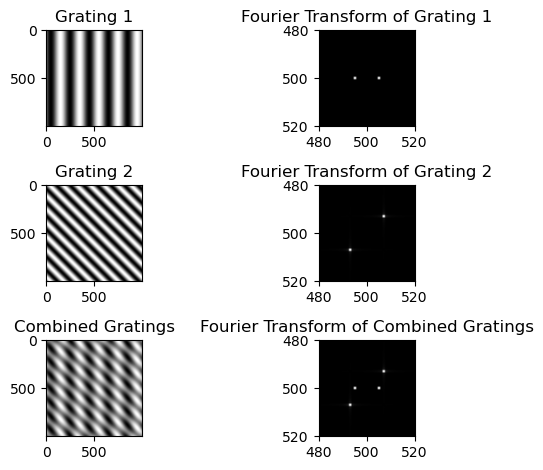

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 500, 1)
X, Y = np.meshgrid(x, x)

# 주기와 주파수 설정
T_1 = 200  # 주기 설정
f_1 = 1 / T_1
angle_1 = 0

grating_1 = np.sin(2 * np.pi * f_1 * (X * np.cos(angle_1) - Y * np.sin(angle_1)))

T_2 = 100  # 주기 설정
f_2 = 1 / T_2
angle_2 = np.pi / 4

grating_2 = np.sin(2 * np.pi * f_2 * (X * np.cos(angle_2) - Y * np.sin(angle_2)))

gratings = grating_1 + grating_2

# Fourier Transform 함수 정의
def fft(grating):
    ft = np.fft.fft2(grating)
    ft = np.fft.fftshift(ft)
    return ft

# Fourier Transform 시작
grating_1_fft = fft(grating_1)
grating_2_fft = fft(grating_2)
ft = fft(gratings)

# 결과 시각화
plt.set_cmap("gray")

plt.subplot(321)
plt.imshow(grating_1)
plt.title("Grating 1")

plt.subplot(322)
plt.imshow(abs(grating_1_fft))
plt.title("Fourier Transform of Grating 1")
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(323)
plt.imshow(grating_2)
plt.title("Grating 2")

plt.subplot(324)
plt.imshow(abs(grating_2_fft))
plt.title("Fourier Transform of Grating 2")
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(325)
plt.imshow(gratings)
plt.title("Combined Gratings")

plt.subplot(326)
plt.imshow(abs(ft))
plt.title("Fourier Transform of Combined Gratings")
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y

plt.tight_layout()  # 자동으로 레이아웃을 조정하여 겹침 방지
plt.show()


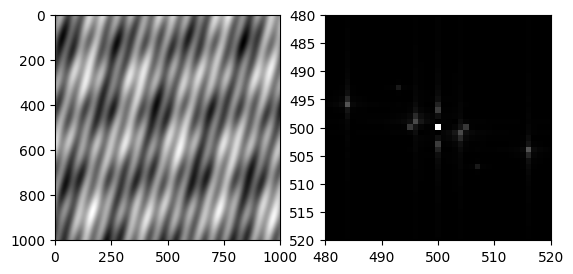

In [22]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1

T = 200, 100, 250, 300, 60
f = 1/np.array(T)
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, freq, angle in zip(amplitudes, f, angles):
    gratings += amp * np.sin(
        2*np.pi*freq*(X*np.cos(angle) + Y*np.sin(angle))
    )

# DC 성분 추가
gratings += 1.25

ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480]) 
plt.show()

기본 이미지 shape:  (301, 301, 4)
Gray 변환 이미지 shape (301, 301)


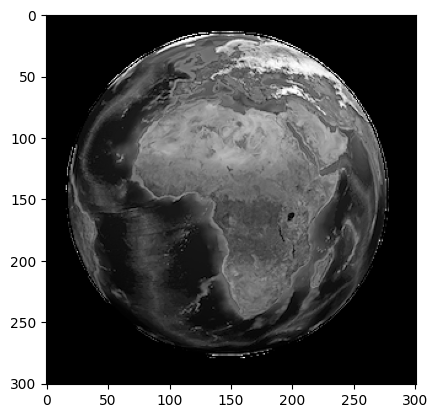

In [31]:
# 이미지 Gray로 불러오기
import matplotlib.pyplot as plt

img = plt.imread('Earth.png')
print("기본 이미지 shape: ",img.shape)
# Gray로 변환
img = img[:,:, :3].mean(axis=2)
print("Gray 변환 이미지 shape",img.shape)

plt.set_cmap("gray")
plt.imshow(img)
plt.show()

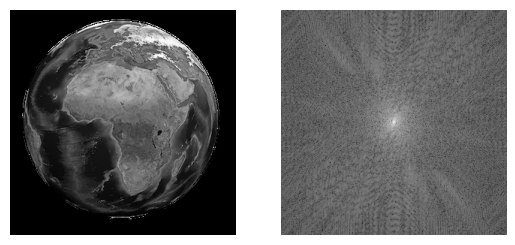

In [35]:
# 이미지에 Fourier Transfrom 진행
import numpy as np
import matplotlib.pyplot as plt

# fft 함수 설정
def fft(image):
    ft = np.fft.ifftshift(image)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    return ft

image = plt.imread("Earth.png")
image = image[:, :, :3].mean(axis=2)

plt.set_cmap("gray")

ft = fft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")

plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()

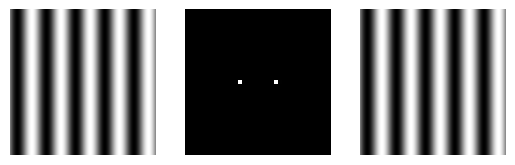

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

T = 200  # 주기 설정
f = 1 / T
angle = 0

grating = np.sin(2 * np.pi * f * (X * np.cos(angle) - Y * np.sin(angle)))

plt.set_cmap("gray")

plt.subplot(131)
plt.imshow(grating)
plt.axis("off")

# Calculate the Fourier transform of the grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(132)
plt.imshow(abs(ft))
plt.axis("off")
plt.xlim([480, 520])
plt.ylim([520, 480])

# Calculate the inverse Fourier transform
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part

plt.subplot(133)
plt.imshow(ift)
plt.axis("off")
plt.show()

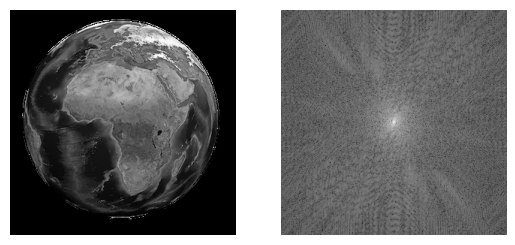

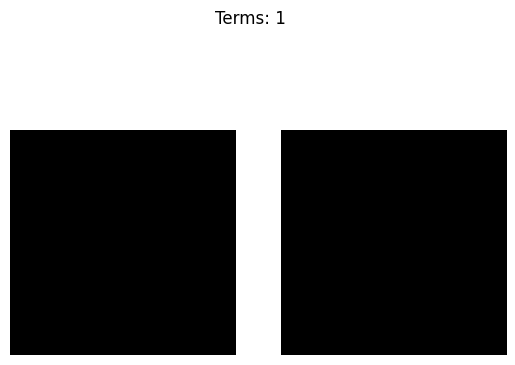

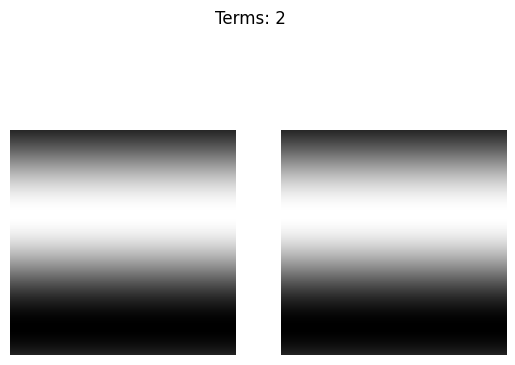

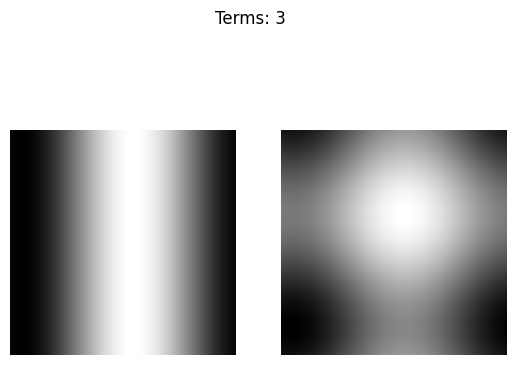

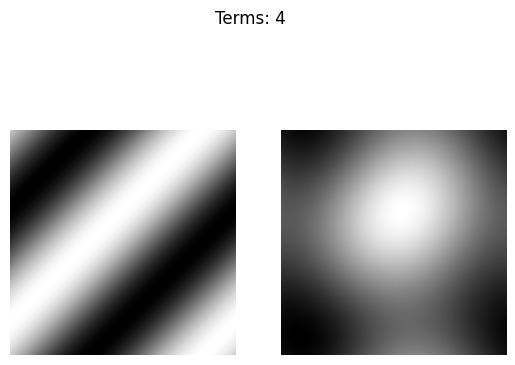

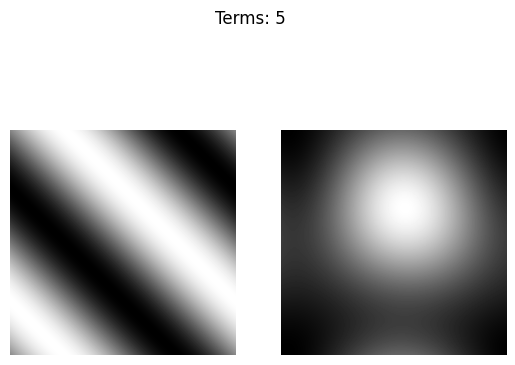

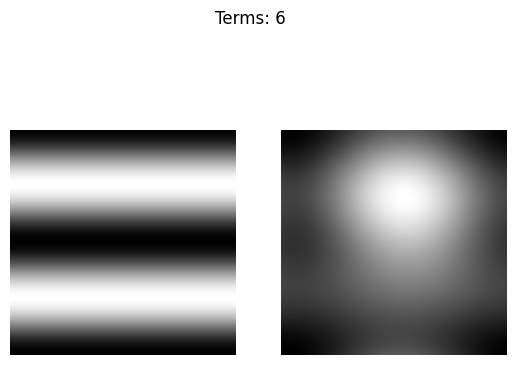

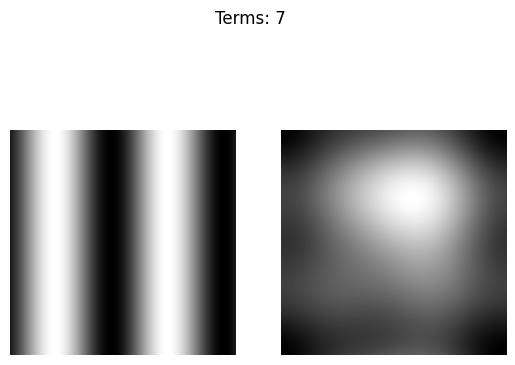

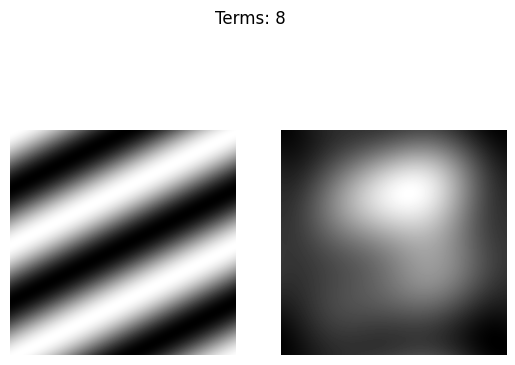

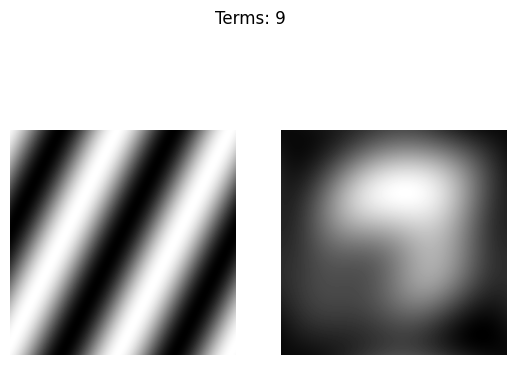

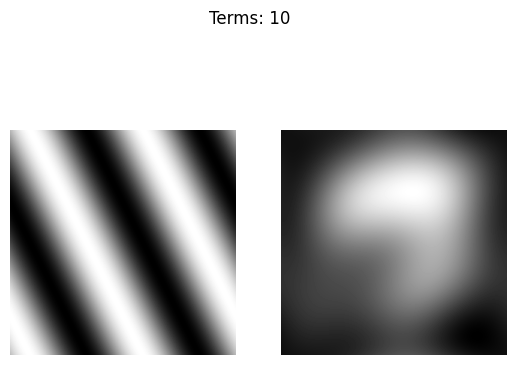

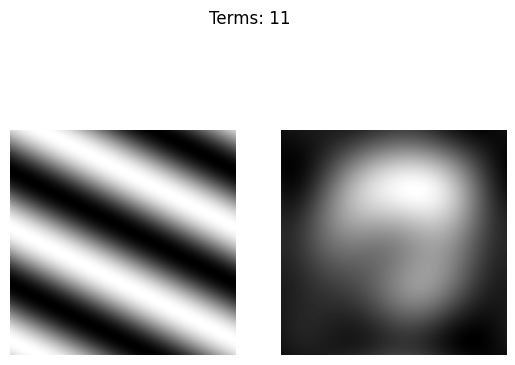

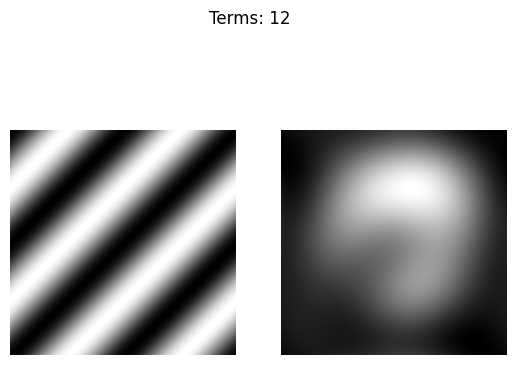

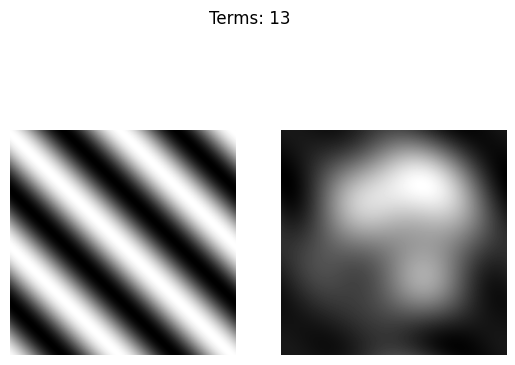

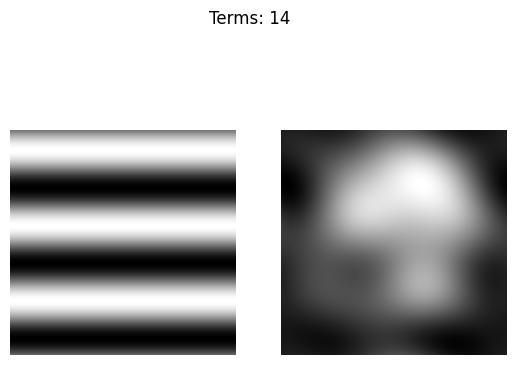

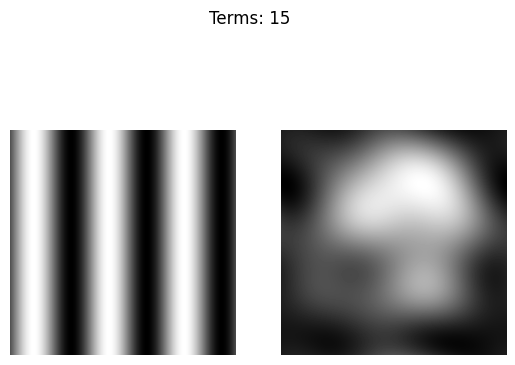

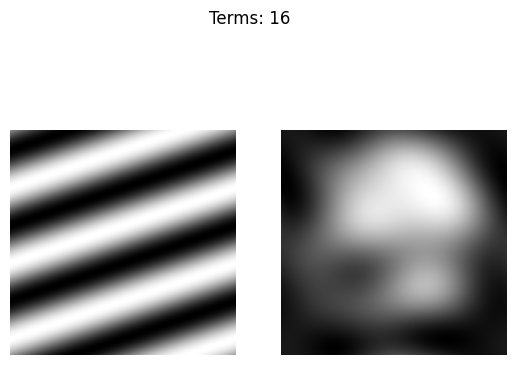

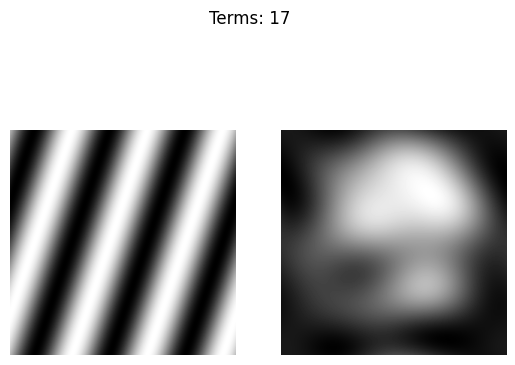

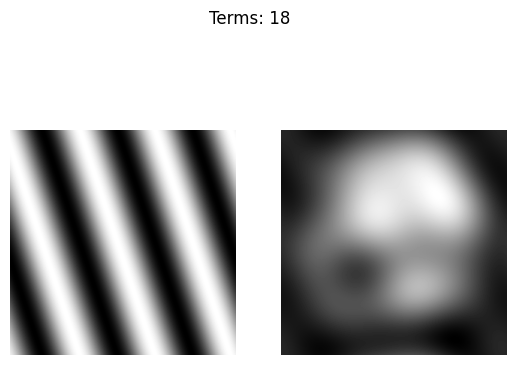

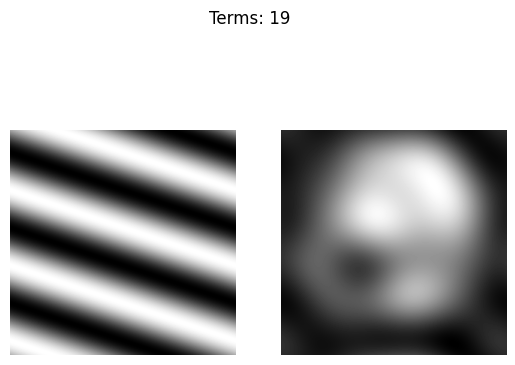

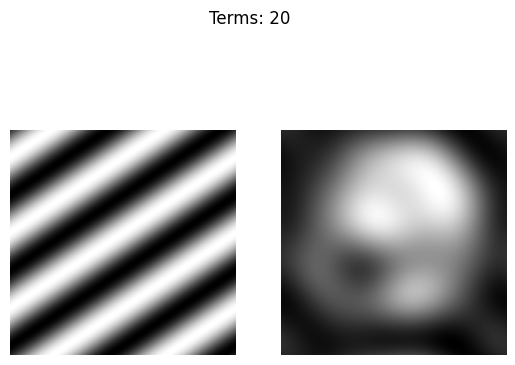

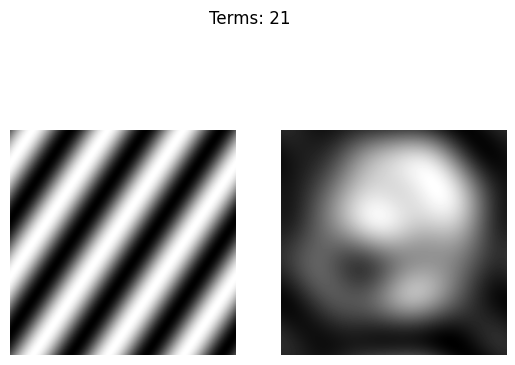

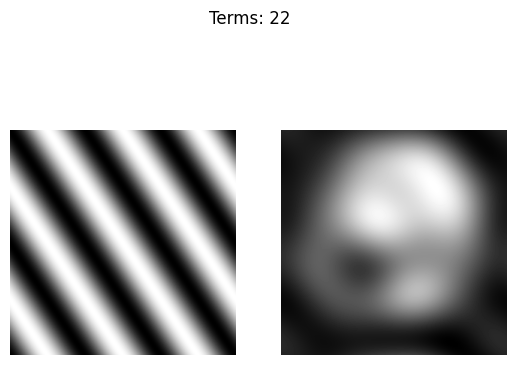

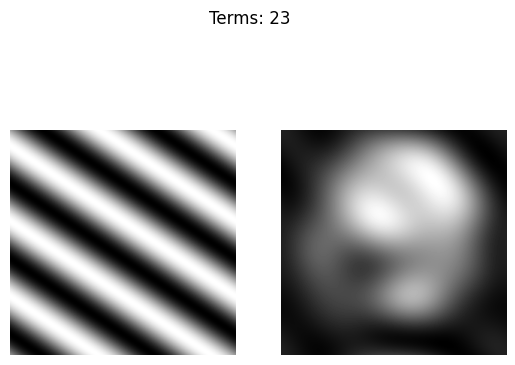

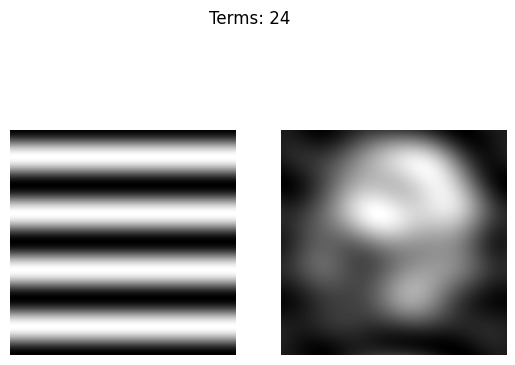

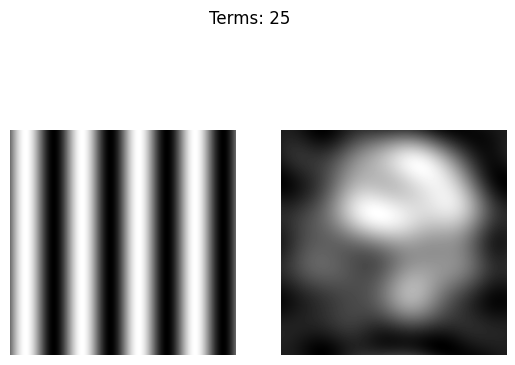

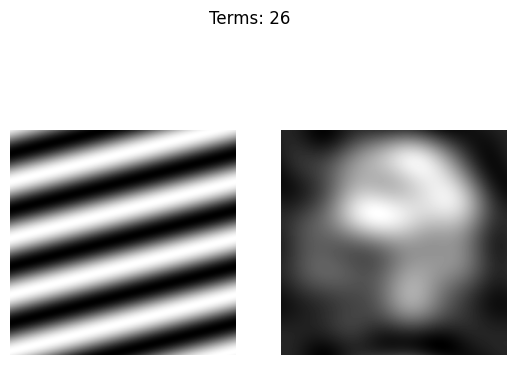

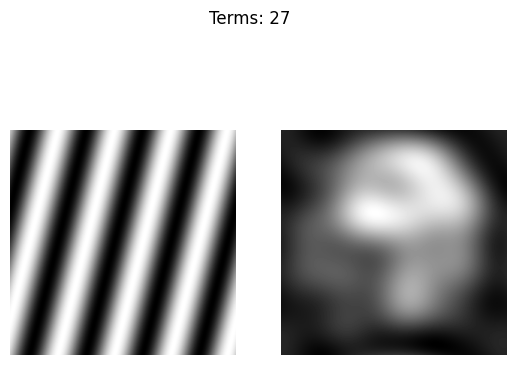

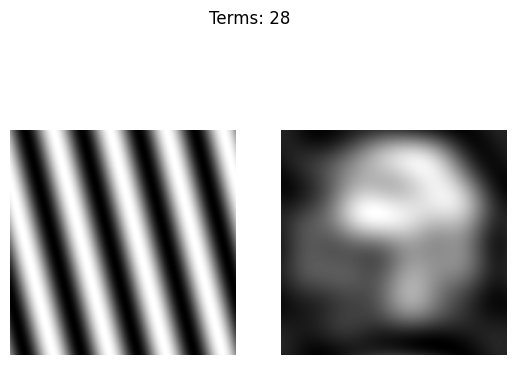

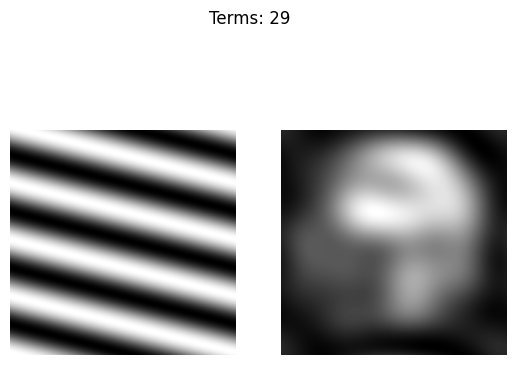

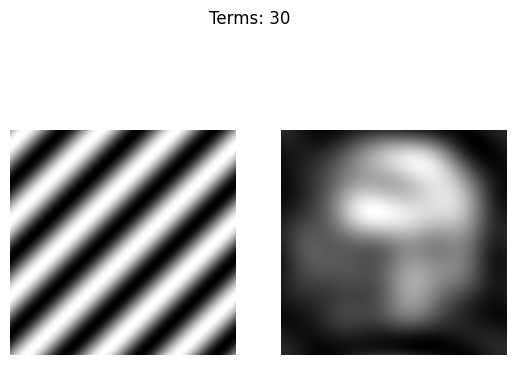

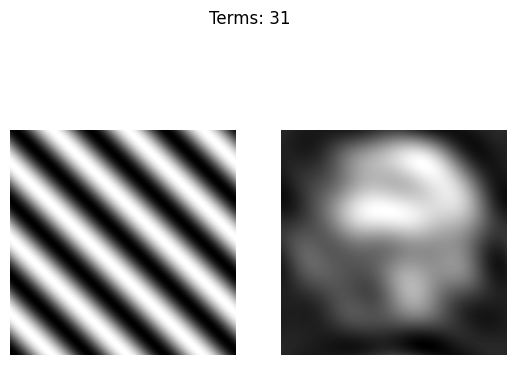

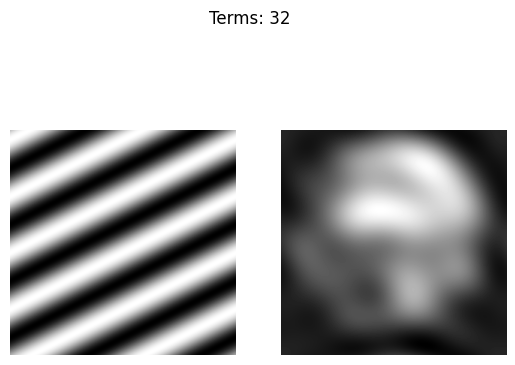

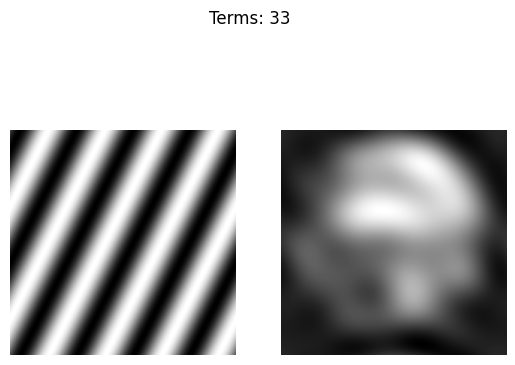

KeyboardInterrupt: 

In [2]:
# fourier_synthesis.py

import numpy as np
import matplotlib.pyplot as plt

image_filename = "Earth.png"

def fft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def ifft(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )


def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)


image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)


array_size = len(image)
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)

# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap("gray")

ft = fft(image)

# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0

# 이미지의 주파수 차원에서 저주파 -> 고주파까지의 주파수를 점점 더함으로 이미지를 재구축함
for coords in coords_left_half:
    # Central column: only include if points in top half of the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = ifft(individual_grating)
        rec_image += rec_grating
        
        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        display_plots(rec_grating, rec_image, idx)

plt.show()